In [34]:
class SelectWhere(bt.Algo):

    """
    Selects securities based on an indicator DataFrame.

    Selects securities where the value is True on the current date (target.now).

    Args:
        * signal (DataFrame): DataFrame containing the signal (boolean DataFrame)

    Sets:
        * selected

    """
    def __init__(self, signal):
        self.signal = signal

    def __call__(self, target):
        # get signal on target.now
        if target.now in self.signal.index:
            sig = self.signal.ix[target.now]

            # get indices where true as list
            selected = list(sig.index[sig])

            # save in temp - this will be used by the weighing algo
            target.temp['selected'] = selected

        # return True because we want to keep on moving down the stack
        return True

In [35]:
import bt

#Get data
data = bt.get('spy,agg', start='2010-01-01')

# create the strategy
s = bt.Strategy('above50sma', [SelectWhere(data > sma),
                               bt.algos.WeighEqually(),
                               bt.algos.Rebalance()])

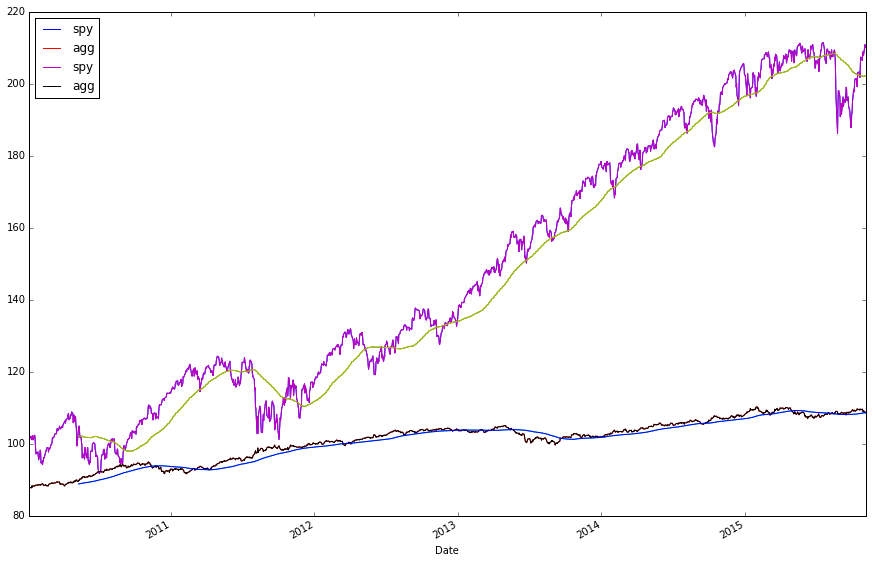

In [36]:
'''Plot data with indicators'''

# calculate moving average DataFrame using pandas' rolling_mean
import pandas as pd
# a rolling mean is a moving average, right?
sma = pd.rolling_mean(data, 89)
plot = bt.merge(data, sma).plot(figsize=(15, 10))

In [37]:
# create a backtest and run it
test = bt.Backtest(s, data)
res = bt.run(test)

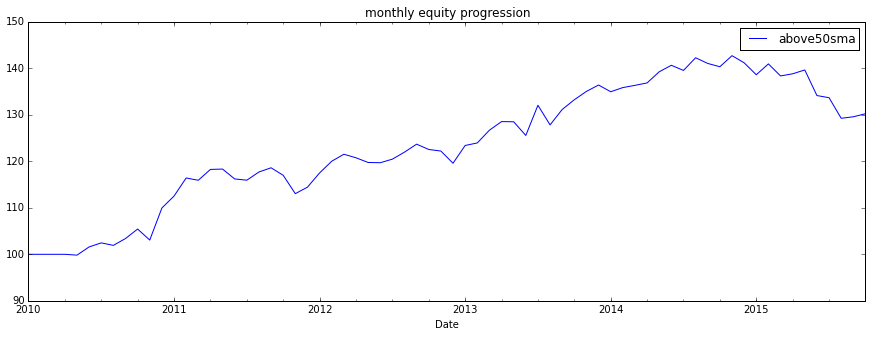

In [38]:
# first let's see an equity curve
res.plot()

In [39]:
# ok and what about some stats?
l

Stat                 above50sma
-------------------  ------------
Start                2010-01-04
End                  2015-11-05
Risk-free rate       0.00%

Total Return         30.66%
Daily Sharpe         0.72
CAGR                 4.69%
Max Drawdown         -9.79%

MTD                  0.33%
3m                   -2.26%
6m                   -5.43%
YTD                  -7.46%
1Y                   -6.99%
3Y (ann.)            2.08%
5Y (ann.)            3.98%
10Y (ann.)           4.69%
Since Incep. (ann.)  4.69%

Daily Sharpe         0.72
Daily Mean (ann.)    4.80%
Daily Vol (ann.)     6.63%
Daily Skew           -0.49
Daily Kurt           4.31
Best Day             2.13%
Worst Day            -2.48%

Monthly Sharpe       0.74
Monthly Mean (ann.)  4.80%
Monthly Vol (ann.)   6.45%
Monthly Skew         0.31
Monthly Kurt         1.48
Best Month           6.69%
Worst Month          -3.94%

Yearly Sharpe        0.49
Yearly Mean          3.74%
Yearly Vol           7.63%
Yearly Skew          -0.28


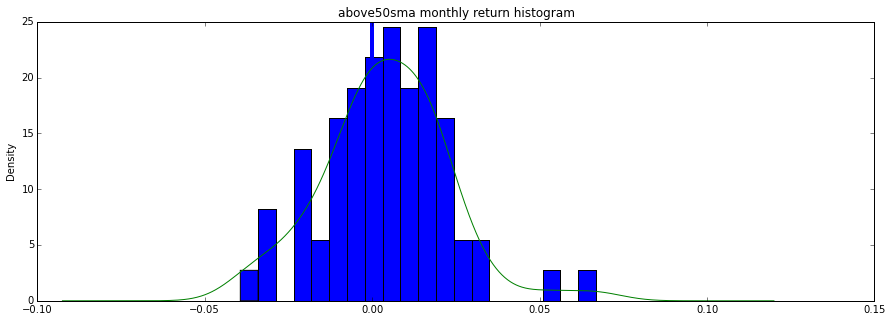

In [40]:
# ok and how does the return distribution look like?
res.plot_histogram()